# Morgan & Morgan Business Analyst Evaluation

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
settle= pd.read_excel('settlement.xlsx')
emp=pd.read_excel('employee.xlsx')

In [318]:
settle.head()

,Case Number,Signup Date,Resolution Date,Handling Attorney: Employee ID,Handling Attorney Name,Handling Paralegal: Employee ID,Handling Paralegal Name,Settlement Amount,Case Expenses
0,CASE-351093,2020-12-21,2021-08-23,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,5040.0,732
1,CASE-352994,2020-10-19,2021-08-30,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,4128.0,1090
2,CASE-215014,2020-05-21,2021-01-26,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,7200.0,891
3,CASE-258435,2020-04-28,2021-03-29,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,4800.0,1227
4,CASE-262572,2020-05-05,2021-04-19,0053c00000BsLPx,Blake Caldwell,0051J000004Xnhs,Alyssa Nicolicchia,5760.0,1098


In [319]:
emp.head()

,Active Employee,Employee ID,Title,Office,Department,Hire Date
0,Yes,0051J000004ba0z,Attorney,Chicago,Workers Comp,2018-04-02
1,Yes,0051J000004bboC,Paralegal,Chicago,Workers Comp,2018-04-07
2,Yes,0051J000004bbqS,Attorney,Detroit,Workers Comp,2018-04-08
3,Yes,0051J000004bbqX,Attorney,Detroit,Workers Comp,2018-04-08
4,No,0051J000004bbvw,Paralegal,Chicago,Workers Comp,2018-04-09


## 1. Department's total revenue and average fee in 2019, 2020 & 2021

In [3]:
growth=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')[['Resolution Date','Case Expenses','Settlement Amount','Department','Office']]
growth['year']=pd. DatetimeIndex(pd.to_datetime(growth['Resolution Date'],format='%Y%m%d')).year
growth['revenue']=growth['Settlement Amount']-growth['Case Expenses']
growth

,Resolution Date,Case Expenses,Settlement Amount,Department,Office,year,revenue
0,2020-03-31,2197,6666.660,Workers Comp,Chicago,2020,4469.660
1,2020-03-31,1142,4666.660,Workers Comp,Chicago,2020,3524.660
2,2020-03-31,1636,6666.660,Workers Comp,Chicago,2020,5030.660
3,2020-03-31,3913,10000.000,Workers Comp,Chicago,2020,6087.000
4,2020-05-11,2658,6666.660,Workers Comp,Chicago,2020,4008.660
...,...,...,...,...,...,...,...
46911,2021-07-15,1360,13200.000,Personal Injury,Kansas City,2021,11840.000
46912,2021-07-15,204,799.992,Personal Injury,Kansas City,2021,595.992
46913,2021-07-22,4446,39999.996,Personal Injury,Kansas City,2021,35553.996
46914,2021-07-27,2820,13200.000,Personal Injury,Kansas City,2021,10380.000


### Total Revenue 

In [303]:
revenue=pd.melt(growth[['revenue','year','Department']].groupby(['Department','year']).sum().T)
revenue['value']=round(revenue['value'].astype('int64')/100000,2)

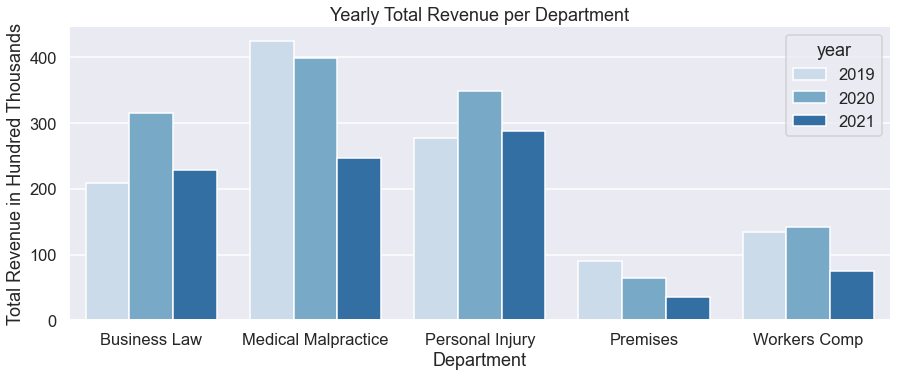

In [5]:
sns.set('talk')
ax=sns.catplot(x='Department',y='value',hue='year',data=revenue,kind='bar',dodge = True,aspect=2.5,palette="Blues", legend_out=False)\
.set(ylabel='Total Revenue in Hundred Thousands', xlabel='Department', title='Yearly Total Revenue per Department')

### Average Fee

In [302]:
expenses=pd.melt(growth[['Case Expenses','year','Department']].groupby(['Department','year']).mean().T)

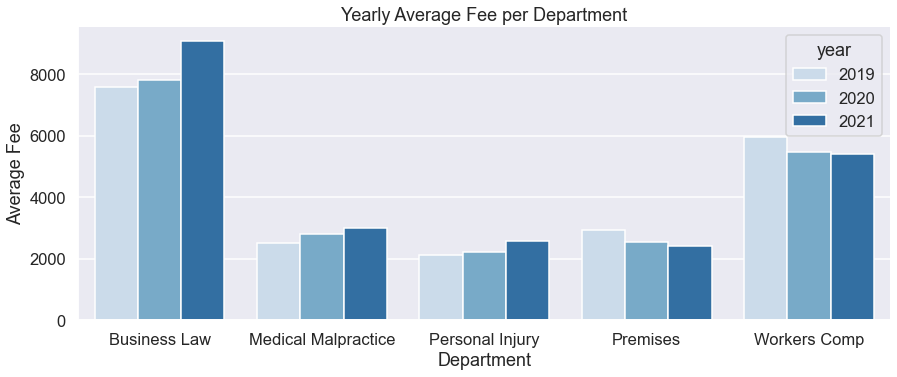

In [7]:
sns.set('talk')
ax=sns.catplot(x='Department',y='value',hue='year',data=expenses,kind='bar',aspect=2.5,palette="Blues", legend_out=False)\
.set(ylabel='Average Fee', xlabel='Department', title='Yearly Average Fee per Department')


## 2. Office's year-over-year growth in revenue.

In [301]:
of_rev=pd.melt(growth[['year', 'Office','revenue']].groupby(["Office",'year']).sum().T)
of_rev['value']=round(of_rev['value'].astype('int64')/100000,2)

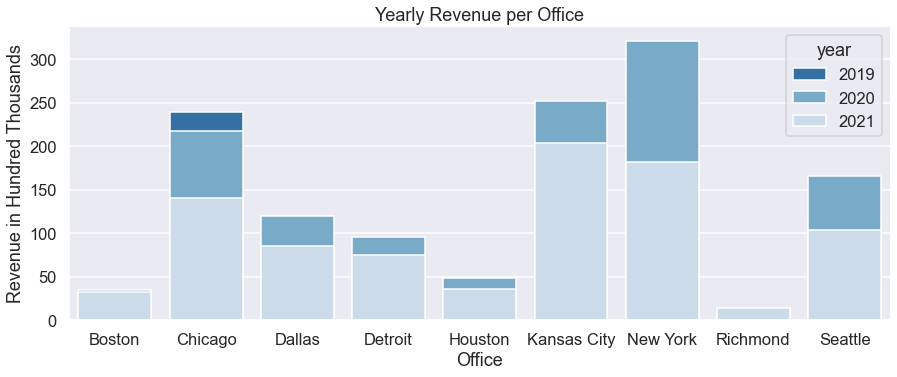

In [304]:
sns.set('talk')
ax=sns.catplot(x='Office',y='value',hue='year',data=of_rev,dodge = False,kind='bar',aspect=2.5,palette="Blues_r", legend_out=False)\
.set(ylabel='Revenue in Hundred Thousands', xlabel='Office', title='Yearly Revenue per Office')

## 3. Detailed analysis of which departments or offices the firm should expand or scale back.


In [320]:
departments=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Resolution Date','Handling Attorney Name',"Office","Department",'Settlement Amount','Case Expenses','Case Number']]

In [321]:
departments

,Hire Date,Resolution Date,Handling Attorney Name,Office,Department,Settlement Amount,Case Expenses,Case Number
0,2018-04-02,2020-03-31,Ryan Sandor,Chicago,Workers Comp,6666.660,2197,CASE-155456
1,2018-04-02,2020-03-31,Ryan Sandor,Chicago,Workers Comp,4666.660,1142,CASE-155457
2,2018-04-02,2020-03-31,Ryan Sandor,Chicago,Workers Comp,6666.660,1636,CASE-155458
3,2018-04-02,2020-03-31,Ryan Sandor,Chicago,Workers Comp,10000.000,3913,CASE-155460
4,2018-04-02,2020-05-11,Ryan Sandor,Chicago,Workers Comp,6666.660,2658,CASE-164044
...,...,...,...,...,...,...,...,...
46911,2016-02-07,2021-07-15,Michael Jordan,Kansas City,Personal Injury,13200.000,1360,CASE-343765
46912,2016-02-07,2021-07-15,Michael Jordan,Kansas City,Personal Injury,799.992,204,CASE-343766
46913,2016-02-07,2021-07-22,Michael Jordan,Kansas City,Personal Injury,39999.996,4446,CASE-345027
46914,2016-02-07,2021-07-27,Michael Jordan,Kansas City,Personal Injury,13200.000,2820,CASE-345750


In [322]:
departments['revenue']=round(departments['Settlement Amount']-departments['Case Expenses'],2)
departments['revenue']=round(departments['revenue']/1000,2)
departments['Case Expenses']=round(departments['Case Expenses']/1000,2)
departments['Resolution Date']=pd.DatetimeIndex(pd.to_datetime(departments['Hire Date'],format='%Y%m%d'))

In [323]:
departments

,Hire Date,Resolution Date,Handling Attorney Name,Office,Department,Settlement Amount,Case Expenses,Case Number,revenue
0,2018-04-02,2018-04-02,Ryan Sandor,Chicago,Workers Comp,6666.660,2.20,CASE-155456,4.47
1,2018-04-02,2018-04-02,Ryan Sandor,Chicago,Workers Comp,4666.660,1.14,CASE-155457,3.52
2,2018-04-02,2018-04-02,Ryan Sandor,Chicago,Workers Comp,6666.660,1.64,CASE-155458,5.03
3,2018-04-02,2018-04-02,Ryan Sandor,Chicago,Workers Comp,10000.000,3.91,CASE-155460,6.09
4,2018-04-02,2018-04-02,Ryan Sandor,Chicago,Workers Comp,6666.660,2.66,CASE-164044,4.01
...,...,...,...,...,...,...,...,...,...
46911,2016-02-07,2016-02-07,Michael Jordan,Kansas City,Personal Injury,13200.000,1.36,CASE-343765,11.84
46912,2016-02-07,2016-02-07,Michael Jordan,Kansas City,Personal Injury,799.992,0.20,CASE-343766,0.60
46913,2016-02-07,2016-02-07,Michael Jordan,Kansas City,Personal Injury,39999.996,4.45,CASE-345027,35.55
46914,2016-02-07,2016-02-07,Michael Jordan,Kansas City,Personal Injury,13200.000,2.82,CASE-345750,10.38


In [328]:
sns.tsplot(data = departments['revenue'], time = departments['Reolution Date'])

AttributeError: module 'seaborn' has no attribute 'tsplot'

In [ ]:
sns.tsplot()

## 4. Attorneys that should be put on a PIP

In [308]:
performance=pd.merge(emp,settle,left_on='Employee ID',right_on='Handling Attorney: Employee ID')\
[['Hire Date','Handling Attorney Name','Settlement Amount','Case Expenses','Case Number']]

In [100]:
performance['Collection Rate']=round(performance['Settlement Amount']/performance['Case Expenses'],2)
performance['revenue']=round(performance['Settlement Amount']-performance['Case Expenses'],2)
performance['Expense percent']=round((performance['Case Expenses']*100)/performance['Settlement Amount'])
performance['years working']=2021-pd.DatetimeIndex(pd.to_datetime(performance['Hire Date'],format='%Y%m%d')).year

In [290]:
rates=performance[['Handling Attorney Name','revenue','Collection Rate','years working']].groupby('Handling Attorney Name').mean().reset_index()
low_perf=rates.drop('revenue',axis=1).sort_values(by=['Collection Rate']).head(10)

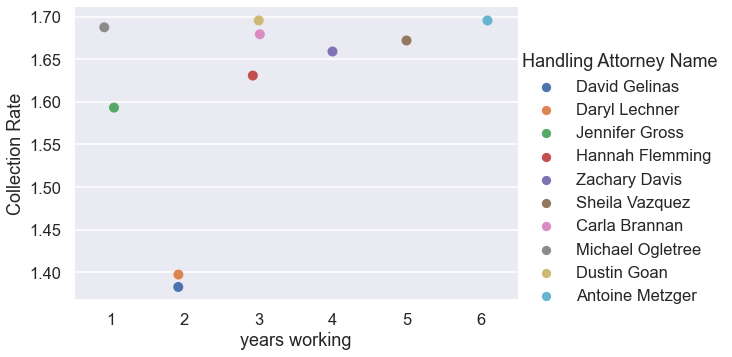

In [296]:

ax=sns.catplot(x='years working',y='Collection Rate',hue='Handling Attorney Name', aspect=1.5,s = 10,data=low_perf, legend_out=True)

In [297]:
exp_per=performance[['Handling Attorney Name','revenue','Case Expenses','Expense percent','years working']].groupby('Handling Attorney Name').mean().sort_values('Expense percent', ascending=False).head(10)
exp_per['revenue']=round(exp_per['revenue']/1000,2)
exp_per['Case Expenses']=round(exp_per['Case Expenses']/1000,2)

In [311]:
exp_per

,revenue,Case Expenses,Expense percent,years working
Handling Attorney Name,,,,
David Gelinas,6.17,16.03,72.575163,2.0
Daryl Lechner,5.97,15.48,71.727273,2.0
Jennifer Gross,3.00,5.97,65.030303,1.0
Hannah Flemming,15.88,29.87,63.476190,3.0
Zachary Davis,2.96,5.19,62.700000,4.0
Sheila Vazquez,5.84,9.61,61.843750,5.0
Antoine Metzger,4.68,8.40,61.627119,6.0
Dustin Goan,4.44,6.81,61.571429,3.0
Carla Brannan,2.44,3.96,61.450000,3.0


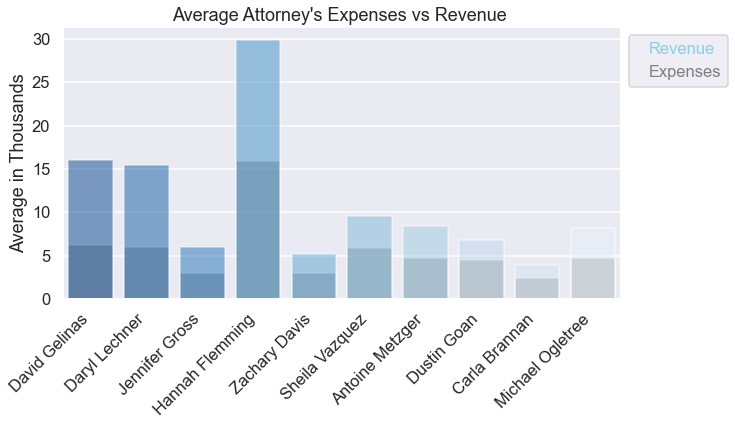

In [300]:
plt.figure(figsize=(10,5))
for y,col,c in ["revenue",None,'Grey'],['Case Expenses','Blues_r',None]:
    sns.barplot(x=exp_per.index,y=exp_per[y],palette=col,color=c,alpha=0.5,saturation=1000,)
    plt.xticks(rotation = 45, ha = 'right')
    plt.ylabel('Average in Thousands')
    plt.title('Average Attorney\'s Expenses vs Revenue ')
    plt.xlabel('')
plt.legend(labels=["Revenue","Expenses"], labelcolor=['skyblue','gray'], handlelength=0,loc = 2, bbox_to_anchor = (1,1))



In [305]:
aspect=2.5,

In [307]:
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center

AttributeError: 'FacetGrid' object has no attribute 'patches'